# How to measure performance of regression models

- Accuracy (e.g. classification accuracy) is a measure for classification, not regression.
- We cannot measure accuracy for regression model
- the performance of a regression model must be reported as the errors in those predictions


Reference:
https://machinelearningmastery.com/regression-metrics-for-machine-learning/

## Mean Squared Error

$MSE = \sum_{i=1}^n(y_i - \hat{y_i})^2$

If the MSE = 0.0, then all predictions match the actual value. Compared to MAE, it is not robust to outliers.

In [15]:
import pandas as pd
from sklearn.metrics import mean_squared_error

In [5]:
# real value
y_true = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# predicted value
y_pred = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]

In [14]:
print(f"MSE: {mean_squared_error(y_true, y_pred)}")

MSE: 0.35000000000000003


In [13]:
# How to calculate the mean squared error
errors = []
for i in range(len(y_true)):
    errors.append((y_true[i] - y_pred[i]) ** 2)

print(f"MSE: {sum(errors) / len(errors)}")

MSE: 0.35000000000000003


Text(0, 0.5, 'MSE')

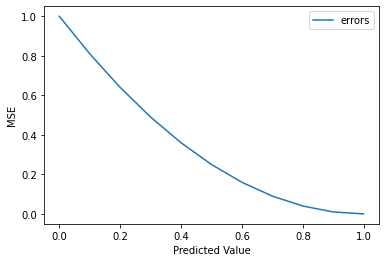

In [22]:
df = pd.DataFrame({"y_true": y_true, "y_pred": y_pred, "errors": errors})
ax = df.plot(x="y_pred", y="errors")
ax.set_xlabel("Predicted Value")
ax.set_ylabel("MSE")

## Root Mean Squared Error

$RMSE = \sqrt(MSE)$

A perfect RMSE is 0.0.

In [23]:
import math

In [24]:
math.sqrt(mean_squared_error(y_true, y_pred))

0.5916079783099616

In [25]:
mean_squared_error(y_true, y_pred, squared=False)

0.5916079783099616

# Performance measure for feature selection

MSE and $R^2$ are unsuitable for comparing models during feature selection. When adding new features in data the $R^2$ score starts increasing or remains constant but never decreases. The problem is adding irrelevant features could also contribute to the increase of $R^2$.

By using the adjusted $R^2$, it is possible to consider both performance and number of features.


$R_{adj}^2 = 1 - \frac{(1 - R^2)(n-1)}{(n-p-1)}$

Where
- $p$ is the number of predictors
- $n$ is the number of observations

The intuition behind $R^2$ is the following:

- $R_{adj}^{2}$ increases if the numerator decreases, that is, if $R^2$ is large
- $R_{adj}^2$ increases if the denominator increases, that is, if $p$ is small



$R_{adj}^2$ is especially useful for exhaustive search, stepwise, or backward and forward selection. Use adjusted R-squared to compare the goodness-of-fit for regression models that contain differing numbers of independent variables.

Reference: 
- https://www.datascienceblog.net/post/machine-learning/performance-measures-feature-selection/
- http://facweb.cs.depaul.edu/sjost/csc423/documents/model-selection.htm

## What is a Good R-Squared value?

- $R^2$ is a measure of how well a linear regression model fits a dataset
- $R^2$ is the proportion of variance in the response variable that can be explained by the predictor variable
- the value of $R^2$ can range from 0 to 1
- a value of 0 indicates that the response variable cannot be explained by the predictor variable at all
- a value of 1 indicates that the response variable can be perfectly explained without error by the predictor variable
- model performance increases as $R^2$ moves towards 1
- an $R^2 = 0.8$ means your model is able to explain 80% of the variance 


Reference:
https://www.statology.org/good-r-squared-value/